 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [15]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [19]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [21]:
# Count nulls
whale.isna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
2015-03-10,False,False,False,False
2015-03-11,False,False,False,False
2015-03-12,False,False,False,False


In [34]:
# Drop nulls
whale.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [26]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [27]:
# Count nulls
algo.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
2014-06-04,False,True
2014-06-05,False,False
2014-06-06,False,False
2014-06-09,False,False


In [35]:
# Drop nulls
algo.dropna(inplace=True)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [86]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
spy = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
spy.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [87]:
# Check Data Types
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
Close    1649 non-null object
dtypes: object(1)
memory usage: 25.8+ KB


In [88]:
# Fix Data Types
spy['Close'] = spy['Close'].str.replace('$', '')
spy.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [100]:
# Calculate Daily Returns
spy1 = spy.astype(float).pct_change()
spy1.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [101]:
# Drop nulls
spy1.dropna(inplace=True)



In [102]:
# Rename Column combined_df.columns = ['MSFT', 'SP500']

spy1.columns = ['S&P 500']
spy1.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [104]:
# Concatenate all DataFrames into a single DataFrame
portfolio = pd.concat([whale, algo, spy1], axis='columns', join="inner")
portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

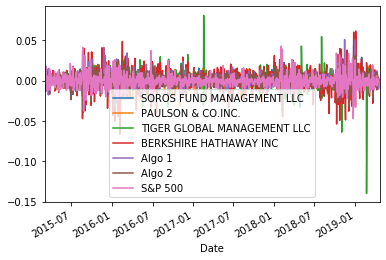

In [105]:
# Plot daily returns
portfolio.plot()

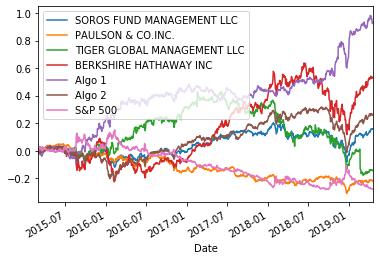

In [106]:
# Plot cumulative returns
cumulative_returns = (1 + portfolio).cumprod() - 1
cumulative_returns.plot()

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [107]:
# Returns by Year
# YOUR CODE HERE

In [108]:
# Top Portfolio returns for 2017
# YOUR CODE HERE

In [109]:
# Returns by Month
# YOUR CODE HERE

In [110]:
# Top Portfolio Returns for December 2018
# YOUR CODE HERE

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

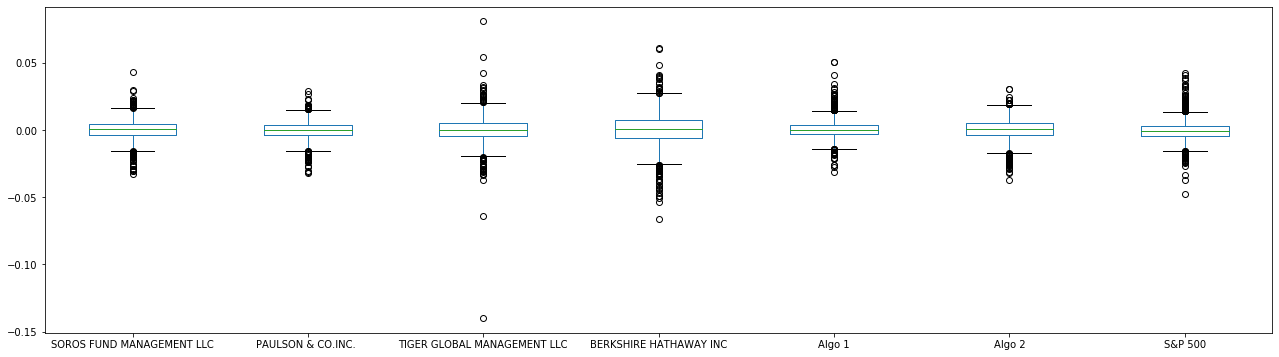

In [111]:
# Box plot to visually show risk
portfolio.plot(kind='box', figsize=(22,6))

In [116]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
portfolio.std() 

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [117]:
# Determine which portfolios are riskier than the S&P 500
portfolio.std().sort_values()

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [120]:
# Calculate the annualized standard deviation (252 trading days)
volatility = portfolio.std() * np.sqrt(252)
print(volatility)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

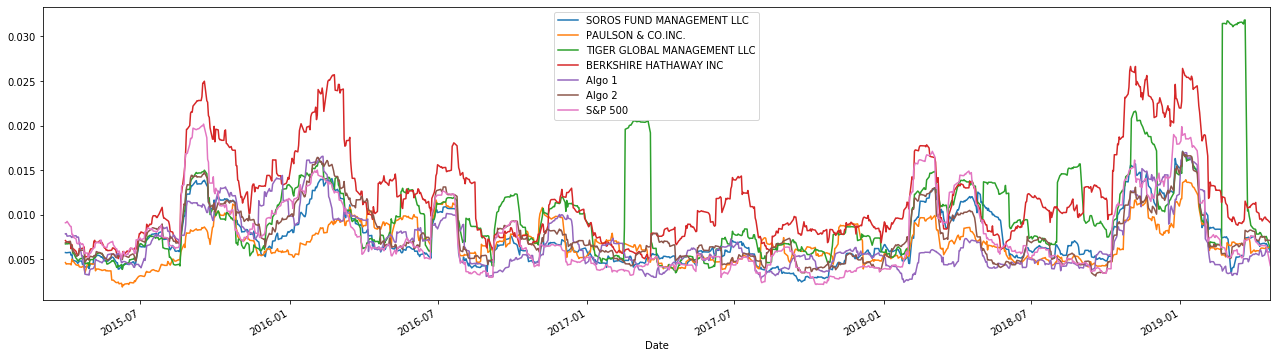

In [124]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
portfolio.rolling(window=21).std().plot(figsize=(22,6))


In [125]:
# Correlation
portfolio.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [129]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
algo1cov = portfolio['Algo 1'].cov(portfolio['S&P 500'])
variance = portfolio['S&P 500'].var()
algo1_beta = algo1cov/variance
algo1_beta

-0.030149214542337772

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

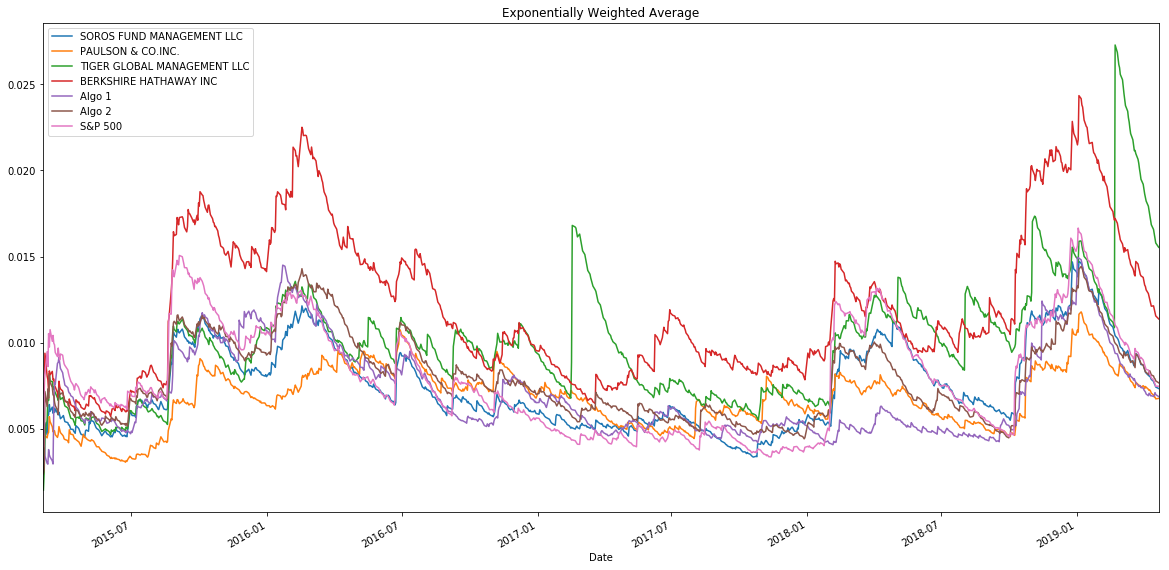

In [28]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [130]:
# Annualzied Sharpe Ratios
sharpe_ratios = (portfolio.mean() * 252) / (portfolio.std() * np.sqrt(252))


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

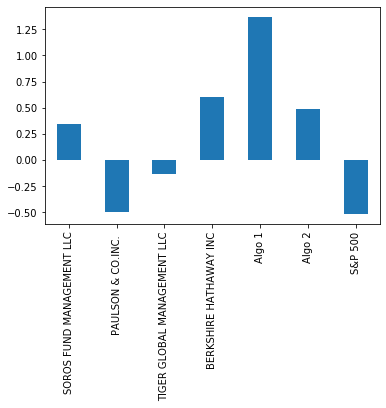

In [134]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [138]:
# Read the first stock
amzn_csv = Path("AMZN.csv")
amzn = pd.read_csv(amzn_csv, index_col="date", parse_dates=True, infer_datetime_format=True)
amzn.head()


,close,volume,open,high,low
date,,,,,
NaT,NaN,NaN,NaN,NaN,NaN
2019-08-16,1792.57,3054240.0,1792.89,1802.9082,1784.5496
2019-08-15,1776.12,3809948.0,1781.99,1788.0000,1761.9600
2019-08-14,1762.96,4893649.0,1793.01,1795.6514,1757.2150
2019-08-13,1824.34,4075021.0,1783.00,1831.7429,1780.0000


In [139]:
# Read the second stock
slb_csv = Path("SLB.csv")
slb = pd.read_csv(slb_csv, index_col="date", parse_dates=True, infer_datetime_format=True)
slb.head()

,close,volume,open,high,low
date,,,,,
NaT,NaN,NaN,NaN,NaN,NaN
2019-08-16,322.03,573548.0,323.52,327.890,319.2600
2019-08-15,320.44,990467.0,320.74,324.865,315.4900
2019-08-14,321.00,1249274.0,330.06,332.200,320.1650
2019-08-13,341.20,576810.0,334.31,348.315,333.3344


In [140]:
# Read the third stock
ulta_csv = Path("ULTA.csv")
ulta = pd.read_csv(ulta_csv, index_col="date", parse_dates=True, infer_datetime_format=True)
ulta.head()

,close,volume,open,high,low
date,,,,,
NaT,NaN,NaN,NaN,NaN,NaN
2019-08-16,32.72,13561280.0,31.64,32.78,31.60
2019-08-15,31.65,20155700.0,32.10,32.15,31.11
2019-08-14,32.34,12761460.0,33.77,33.81,32.20
2019-08-13,34.63,11108320.0,34.10,35.76,33.86


In [192]:
# Concatenate all stocks into a single DataFrame
custom = pd.concat([amzn, slb, ulta], axis='columns', join="inner")
custom.drop(columns=['volume', 'open', 'high', 'low'], inplace=True)

custom.head()

,close,close,close
date,,,
NaT,NaN,NaN,NaN
2019-08-16,1792.57,322.03,32.72
2019-08-15,1776.12,320.44,31.65
2019-08-14,1762.96,321.00,32.34
2019-08-13,1824.34,341.20,34.63


In [201]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices

custom = custom.reset_index(inplace=True)
custom = custom.pivot(values='close', index='date', columns=('AMZN', 'SLB', 'ULTA'))
custom.head()

ValueError: cannot insert level_0, already exists

In [194]:
# Drop Nulls
custom.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [190]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
custom.pct_change()
portfolio_returns = custom.dot(weights)
portfolio_returns.head()

Date
2019-08-16    715.773333
2019-08-15    709.403333
2019-08-14    705.433333
2019-08-13    733.390000
2019-08-12    718.566667
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001217


In [40]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
Custom                         0.211627
dtype: float64

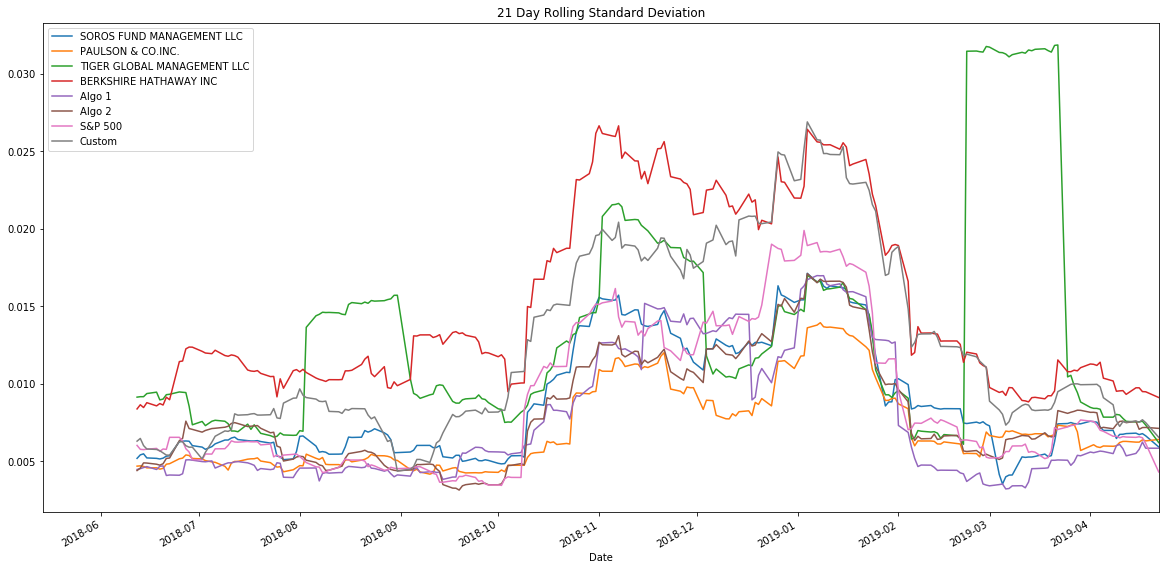

In [42]:
# Rolling
# YOUR CODE HERE

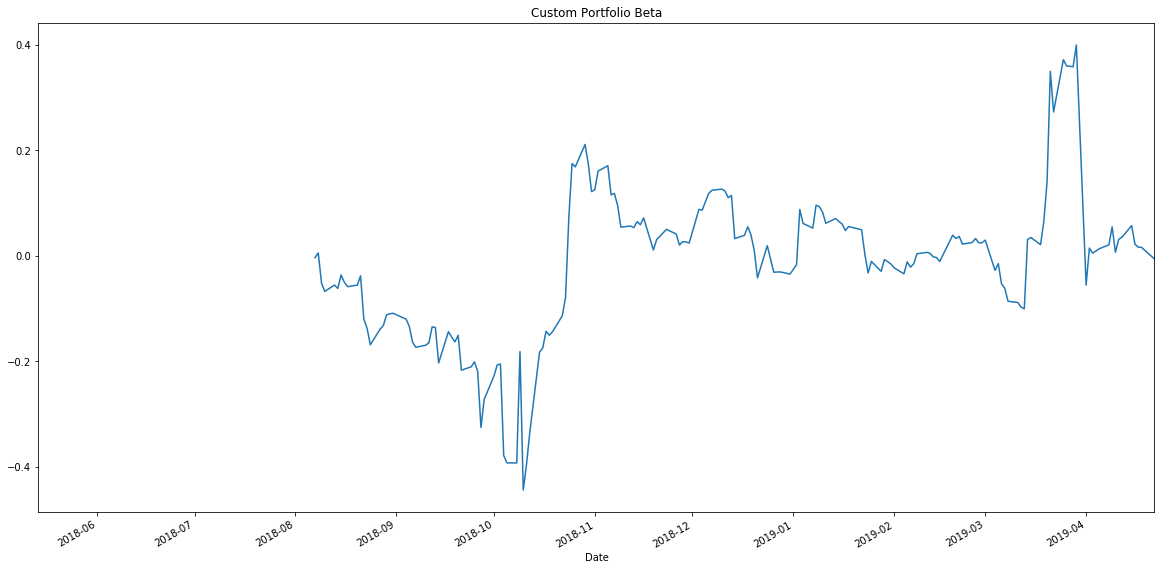

In [43]:
# Beta
# YOUR CODE HERE

In [44]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

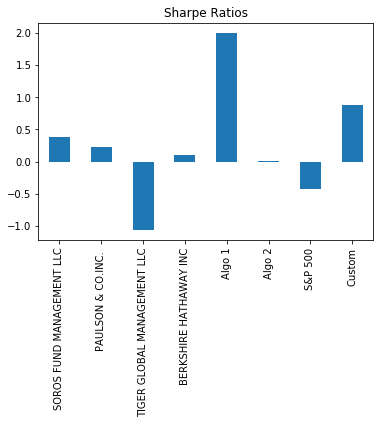

In [45]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [46]:
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791802,0.477844,0.816197,0.336909,0.862583,-0.0282556,0.732548
PAULSON & CO.INC.,0.791802,1,0.484869,0.65039,0.360727,0.783865,-0.0598624,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1,0.324306,0.113671,0.408402,0.00588055,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.65039,0.324306,1,0.325985,0.782054,-0.0388319,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1,-0.0425404,0.73902
S&P 500,-0.0282556,-0.0598624,0.00588055,-0.0388319,-0.054478,-0.0425404,1,0.00560346
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.73902,0.00560346,1
